In [1]:
#Implicit scheme
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
L = 1.0
nx = 51
dx = L/ (nx-1)
alpha = 1.22e-3
q = 0.0

x = numpy.linspace(0.0, L, num=nx)

T0 = numpy.zeros_like(x)
T0[0] = 100.0

In [3]:
#implicit scheme you solve linear system each time step
from scipy import linalg

In [4]:
def lhs_operator(nx, sigma):
    D = numpy.diag((2 + 1/sigma)*numpy.ones(nx-2))
    D[-1, -1] = 1 + 1/sigma
    U = numpy.diag(-1.0*numpy.ones(nx-3), k=1) #Upper diagonal
    L = numpy.diag(-1.0*numpy.ones(nx-3), k =-1) #Diagonal i bir alta kaydiriyor
    A = D + U + L
    return A

In [5]:
#Test
print(lhs_operator(7, 1.0))

[[ 3. -1.  0.  0.  0.]
 [-1.  3. -1.  0.  0.]
 [ 0. -1.  3. -1.  0.]
 [ 0.  0. -1.  3. -1.]
 [ 0.  0.  0. -1.  2.]]


In [6]:
def rhs_vector(T, sigma, q, dx):
    b = T[1 : -1] / sigma
    b[0] += T[0]
    b[-1] += q*dx
    return b

In [7]:
DL = numpy.diag(2.0*numpy.ones(4), k = 1) #k=1 diyince bir kaydirdi
print(DL)

[[0. 2. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0.]]


In [8]:
#backward in time central in space
def btcs(T0, nt, dt, dx, alpha, q):
    sigma = alpha* dt/ dx**2
    A = lhs_operator(nx, sigma)
    T = T0.copy()
    for n in range(nt):
        b = rhs_vector(T, sigma, q, dx)
        T[1 : -1] = linalg.solve(A, b)
        T[-1] = T[-2] + q*dx
    return T

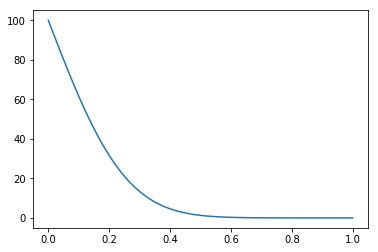

In [9]:
nt = 100
sigma = 0.5
dt = sigma* dx**2 / alpha
T = btcs(T0, nt, dt, dx, alpha, q)
pyplot.plot(x, T)

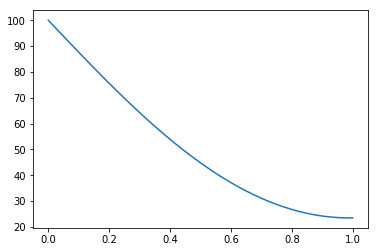

In [10]:
nt = 1000
sigma = 0.5
dt = sigma* dx**2 / alpha
T = btcs(T0, nt, dt, dx, alpha, q)
pyplot.plot(x, T)